#### 3.4 贝叶斯模型比较

在第一章中，我们强调了过拟合问题，以及使用交叉验证技术设置正则化参数值或选择替代模型。这里我们从贝叶斯视角来考虑模型选择问题。在本节中，我们的讨论会非常的一般化，在3.5节我将会看到这些想法是怎样应用到线性回归中的正则化参数的定义的。

正如我们看到的，过拟合是与最大似然相关的，它可以通过在模型参数上的边缘化（求和或积分）取代在值上的点估计。模型可以直接在训练数据上进行比较，并不需要验证集。这使得所有的可用数据用于训练，避免使用交叉验证的对每个模型的多次运行。在训练过程中同时定义多个复杂性参数是可以的。比如，在第7章，我们将引入相关向量机，对于每个训练数据点，贝叶斯模型只有一个复杂性参数。

贝叶斯观点的模型比较简单地包括概率使用来表示模型选择中的不确定性，沿用一致性应用的概率加和和乘积规则。假设我们想比较一个$L$的集合的模型$\{\mathcal{M}_i\}$，其中$i=1,\cdots,L$。这里模型是与观测数据$\mathcal{D}$上的概率分布相关的。在多项式的曲线拟合问题中，分布是在目标值$\mathsf{t}$集合上定义的，而输入值$\mathbf{X}$假设是已知的。其它类型的模型定义了一个在$\mathbf{X}$和$\mathbf{t}$上联合分布。我们假设数据是从这些模型中的一个生产的，但我们不知道到底是哪个。我们的不确定是通过先验分布$p(\mathcal{M}_i)$表达的。给出一个训练集$\mathcal{D}$，我们希望评估后验分布

$$p(\mathcal{M}_i \mid \mathcal{D}) \propto p(\mathcal{M}_i)p(\mathcal{D} \mid \mathcal{M}_i)$$

先验它是对不同模型的偏好。让我们简单假设所有给定的模型的先验是等价。有趣是模型评估$p(\mathcal{D} \mid \mathbf{M}_i)$这项，它表示的是在不同模型下的数据偏好，我们待会儿会详细检查这项。模型评估有时候被称作边缘似然，因为它可以看做是在模型空间上的似然函数，其中参数被边缘化了。对于两个模型的评估率$p(\mathcal{D} \mid \mathcal{M}_i)/p(\mathcal{D} \mid \mathcal{M}_j)$称作贝叶斯因子（Kass和Raftery，1995年）。

一旦我们知道了模型上的后验分布，就可以从加和和乘积规则中得到预测分，如下

$$p(t \mid \mathbf{x},\mathcal{D}) = \sum_{i=1}^Lp(t\mid\mathbf{x},\mathcal{M}_i,\mathcal{D})p(\mathcal{M}_i \mid \mathcal{D})$$

这是通过平均独立模型的预测分布$p(t\mid\mathbf{x},\mathcal{M}_i,\mathcal{D})$，加权这些模型的后验分布$p(\mathcal{M}_i \mid \mathcal{D})$得到的所有预测分布的混合分布的例子。比如，如果我们有两个模型，它们的后验等价于，一个预测在$t=a$附近的窄分布，而另一个预测是在$t=b$附近的窄分布，整体上的预测分布是一个在$t=a$和$t=b$上的单峰分布模型，而不是在$t=(a+b)/2$上的单个模型。

一个简单的近似是模型平均是使用单个大可能模型来单独预测。这就是模型选择。

由参数$\mathbf{w}$集合控制的模型，从概率加和和乘积规则中得到模型评估如下

$$p(\mathcal{D} \mid \mathcal{M}_i) = \int p(\mathcal{D} \mid \mathbf{w}, \mathcal{M}_i)p(\mathbf{w} \mid \mathcal{M}_i)d\mathbf{w}$$

从抽样角度来看，边缘似然可以被看作是从模型中生成数据集$\mathcal{D}$的概率，这个模型的参数来自采样先验。有趣的是，当评估参数上的后验分布时，出现在贝叶斯定理上分母中标准化项就是正当，因为

$$p(\mathbf{w} \mid \mathcal{D}, \mathcal{M}_i) = \frac{p(\mathcal{D} \mid \mathbf{w}, \mathcal{M}_i)p(\mathbf{w} \mid \mathcal{M}_i)}{p(\mathcal{D} \mid \mathcal{M}_i)}$$

我们可以通过参数上的积分做一个简单的近似来更多地了解模型的正当。首先考虑一个一元参数$w$的模型。参数上的后验分布正比于$p(\mathcal{D} \mid w)p(w)$，为了保持符号整洁，我们这里忽略了模型$\mathcal{M}_i$的相关性。如果我们假设后验分布在大概率值$w_{\text{MAP}}$，宽度$\Delta w_{\text{posterior}}$附近是急剧尖峰的，那么我们可以通过被积函数的最大值乘以峰值宽度来近似积分。如果我们进一步假设先验的扁平宽度为$\Delta w_{\text{prior}}$，所以有$p(w) = 1/\Delta w_{\text{prior}}$，那么我们有

$$p(\mathcal{D}) = \int p(\mathcal{D} \mid w)p(w)dw \simeq p(\mathcal{D} \mid w_{\text{MAP}}) \frac{\Delta w_{\text{posterior}}}{\Delta w_{\text{prior}}}$$

所以取对数我们有

$$\ln p(\mathcal{D}) \simeq \ln p(\mathcal{D} \mid w_{\text{MAP}}) + \ln\left(\frac{\Delta w_{\text{posterior}}}{\Delta w_{\text{prior}}}\right)$$

> 注：从以上等式中可以看出，实际在使用最大MAP得到的数据，只是现有观测数据的一种近似，而非等价，这个取决于使用的模型本身，不同的模型的近似程度还不一样，另外剩余项就是对模型的惩罚才能算是真实的数据生成模型。

如图3.12中的似然。第一项表示的是在给出最大可能参数时，拟合的数据，对于扁平的先验来说这就是相应的似然函数。第二项是根据它的复杂性来惩罚模型。因为当$\Delta w_{\text{posterior}} < \Delta w_{\text{prior}}$时，这项为负数，当$\Delta w_{\text{posterior}}/\Delta w_{\text{prior}}$变得更小时，它的变动也就会增加。因此，如果在后验分布中参数能够微调到数据，那么惩罚项会变大。

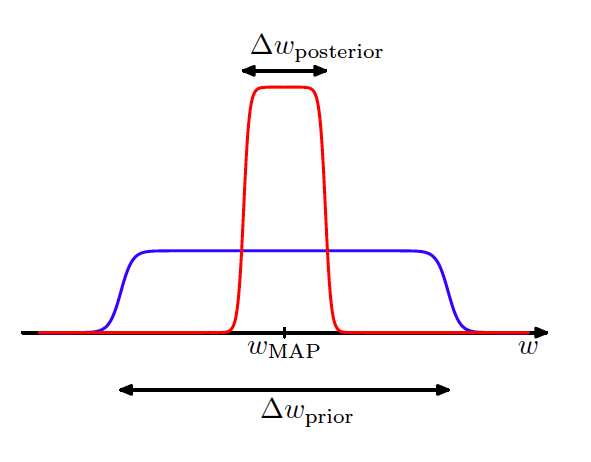

<center>图3.12 如果我们假设参数上的后验分布在模式$w_{\text{MAP}}$附近急剧尖峰，我们可以得到一个对模型正当的大致近似。</center>

对于一组有$M$个参数的模型，我们可以依次对每个参数做很小的近似。假设所有的参数都有同样的比率$\Delta w_{\text{posterior}}/\Delta w_{\text{prior}}$，我们有

$$\ln p(\mathcal{D}) \simeq \ln p(\mathcal{D} \mid w_{\text{MAP}}) + M\ln\left(\frac{\Delta w_{\text{posterior}}}{\Delta w_{\text{prior}}}\right)$$

因此，在这个很小的近似上，复杂度惩罚的大小随着模型中可调参数$M$数量而增长，因为一个复杂模型能更好地拟合数据，第二项也会依赖于$M$而增长。最优模型复杂度，是由最大正当定义，将会在这两个竞争项之间达到平衡后得到。过后我们会开发一个基于高斯近似到后验分布的更加精确的版本。

通过考虑图3.13，我们可以更进一步了解贝叶斯模型比较，明白边际似然是如何成为了中性复杂度的最好模型的。这里的水平轴是可能数据集空间的一维表示，所以坐标轴上的每个数据点相应地是一个特殊的数据集。我们现在考虑三个复杂度相继增加的模型$\mathcal{M}_1, \mathcal{M}_2$和$\mathcal{M}_3$。想象一下运行这些生成模型来生成数据集，然后看一下结果的数据集分布。任何给定模型能够生成各种不同数据集，因为模型参数是由先验概率分布控制的，对于任何参数的选择，在目标变量上都可能存在随机噪声。为了从一个特殊模型中生成一个特殊的数据集，我们先从它们的先验分布$p(\mathbf{w})$中选择参数值，那么对于这些参数值我们从$p(\mathcal{D} \mid \mathbf{w})$中采样数据。一个简单的模型（比如，对于一次多项式）有很小的变化性，所以生成的数据集几乎是相似的。它的分布$p(\mathcal{D})$因而受限于相当小的水平轴区域。相比而言，一个复杂模型（比如9次多项式）会生成有着很大变化的不同数据集，所以他的分布$p(\mathcal{D})$是在一个大的数据集空间去区域扩散的。因为分布$p(\mathcal{D} \mid \mathcal{M}_i)$是标准化过的，我们看到这个特殊数据集$\mathcal{D}_0$对于中等复杂度的模型有着更高值的正当。事实上，更小的模型不不饿能很好地拟合数据，而更复杂的模型它的预测概率会在一个很大的数据集范围内扩散，所以应给它们中的任何一个分配较小的概率。

贝叶斯模型比较框架中隐含的假设是，生成数据的真实分布包含在所考虑的模型集合中。提供的这些，我们可以证明贝叶斯模型比较会平均上偏好正确模型。为了弄明白这个，考虑两个模型$\mathcal{M}_1$和$\mathcal{M}_2$，其真正的对应的是$\mathcal{M}_1$。对于一个给定的有限数据集，对于不准确的模型，很可能贝叶斯因子会更大。因而，如果我们对贝叶斯因子求分布数据集上的平均，我们得到期望贝叶斯因子如下

$$\int p(\mathcal{D} \mid \mathcal{M}_1) \ln \frac{p(\mathcal{D} \mid \mathcal{M}_1)}{p(\mathcal{D} \mid \mathcal{M}_2)}d\mathcal{D}$$

其中均值是用来表示数据的真实分布。这是KL散度的例子，满足性质永远为正，除非这连个部分相等，那么其值为0.因此平均来看贝叶斯因子将一直偏好与正确模型。

我们看到贝叶斯框架避免了过拟合问题，它允许模型可以在训练集基础上单独互相比较。然而，贝叶斯方法，也跟其他模式识别的方法一样，需要对模型的形式做出假设，如果这些都不可用那么结果也会被误导。特别是，我们从3.12中看到，模型的正当在先验的许多方面都可能很敏感，如在尾部的形态。事实上，如果先验不合适的话，那么正当就不能反应出来，如可以通过关注一个不恰当的先验有任意扩展的因子（换句话说，因为分布没有标准化，标准化系数也不会被定义）来看出。如果我们考虑一个合适的先验，然后取一个合适的极限，来得到一个不合适的先验（比如，一个高斯先验取无限方差）那么凭证将会变为0，如3.70和图3.12中看到的那样。它可能，会先考虑在两个模型之间的正当率，然后取一个极限得到有意义的答案。

因此，在实际应用中，留一份独立的测试数据集，以评估系统的整体性能是明智的。